## Zadanie
Rozważmy model sieci S = <G,H>. Przez N=\[n(i,j)] będziemy oznaczać macierz natężeń strumienia pakietów, gdzie element n(i,j) jest liczbą pakietów przesyłanych (wprowadzanych do sieci) w ciągu sekundy od źródła v(i) do ujścia v(j).
* Zaproponuj topologię grafu G ale tak aby żaden wierzchołek nie był izolowany oraz aby: |V|=20, |E|<30. Zaproponuj N oraz następujące funkcje krawędzi ze zbioru H: funkcję przepustowości 'c' (rozumianą jako maksymalną liczbę bitów, którą można wprowadzić do kanału komunikacyjnego w ciągu sekundy), oraz funkcję przepływu 'a' (rozumianą jako faktyczną liczbę pakietów, które wprowadza się do kanału komunikacyjego w ciągu sekundy). Pamiętaj aby funkcja przeplywu realizowała macierz N oraz aby dla każdego kanału 'e' zachodziło: c(e) > a(e).
* Niech miarą niezawodności sieci jest prawdopodobieństwo tego, że w dowolnym przedziale czasowym, nierozspójniona sieć zachowuje T < T_max, gdzie: T = 1/G * SUM_e( a(e)/(c(e)/m - a(e)) ), jest średnim opóźnieniem pakietu w sieci, SUM_e oznacza sumowanie po wszystkich krawędziach 'e' ze zbioru E, 'G' jest sumą wszystkich elementów macierzy natężeń, a 'm' jest średnią wielkością pakietu w bitach. Napisz program szacujący niezawodność takiej sieci przyjmując, że prawdopodobieństwo nieuszkodzenia każdej krawędzi w dowolnym interwale jest równe 'p'. Uwaga: 'N', 'p', 'T_max' oraz topologia wyjsciowa sieci są parametrami.
* Przy ustalonej strukturze topologicznej sieci i dobranych przepustowościach stopniowo zwiększaj wartości w macierzy natężeń. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max]).
* Przy ustalonej macierzy natężeń i strukturze topologicznej stopniowo zwiększaj przepustowości. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max]).
* Przy ustalonej macierzy natężeń i pewnej początkowej strukturze topologicznej, stopniowo zmieniaj topologię poprzez dodawanie nowych krawędzi o przepustowościach będących wartościami średnimi dla sieci początkowej. Jak będzie zmieniać się niezawodność zdefiniowana tak jak punkcie poprzednim (Pr[T < T_max]).

## Sprawozdanie
Do rozwiązania tych zadań wykorzystam biblioteki _NetworkX_, _NumPy_ oraz _Pyvis_.

In [1]:
import random
import networkx as nx
import numpy as np
from pyvis.network import Network

### Punkt 1.<br />
proponowana topologia:

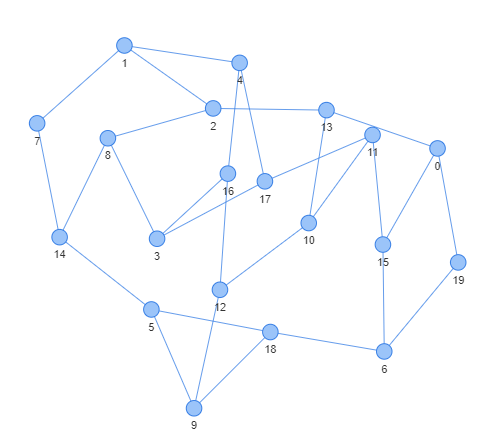

In [2]:
from IPython.display import Image
Image(filename='topology.png')

topologia jako macierz:

In [3]:
connections_matrix = np.matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
                                    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                                    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
                                    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                                    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Jako _*N*_ przyjmuję losową macierz posiadającą wartości między 0 a 5<br />
Jako _*c*_ przyjmuję losową macierz posiadającą wartości między 100 a 300 * średnia wielkość pakietu <br />
Jako _*e*_ przyjmuję macierz będącą wynikiem funkcji:

In [4]:
def packets_on_connection(connections, intensity):
    packets_matrix = np.zeros_like(intensity)
    nx_connections = nx.from_numpy_matrix(connections)
    if not nx.is_connected(nx_connections):
        print("graph is not connected")
        return connections
    for i in range(len(intensity)):
        for j in range(len(intensity)):
            if i == j:
                continue
            track = nx.dijkstra_path(nx_connections, i, j)
            for k in range(len(track) - 1):
                packets_matrix[track[k]][track[(k + 1)]] += intensity[i][j]
    return packets_matrix

Obliczanie parametrów:

In [5]:
avg_packet_size = 1500*8
intensity_matrix = np.random.randint(0, 5, [20, 20])
speed_matrix = np.random.randint(10000000, 100000000, [20, 20])
packets_matrix = packets_on_connection(connections_matrix, intensity_matrix)
graph = nx.from_numpy_matrix(packets_matrix)

### Punkt 2.<br />
funkcja obliczająca T:

In [6]:
def T(speed_matrix, packets_matrix, intensity_matrix, graph, avg_packet_size):
    sum_t = 0
    for i, j in graph.edges():
        sum_t += packets_matrix[i][j] / ((speed_matrix[i][j] / avg_packet_size) - packets_matrix[i][j])
        sum_t += packets_matrix[j][i] / ((speed_matrix[j][i] / avg_packet_size) - packets_matrix[j][i])
    return sum_t / intensity_matrix.sum()

funkcja testująca sieć:

In [7]:
def networkTest(intensity, probability_of_non_failure, t_max, connections, speed, avg_packet_size):
    failed_connections = np.copy(connections)
    for i in range(len(connections)):
        for j in range(i+1, len(connections)):
            if failed_connections[i][j] == 0:
                continue
            if random.random() > probability_of_non_failure:
                failed_connections[i][j] = 0
                failed_connections[j][i] = 0
    if not nx.is_connected(nx.from_numpy_matrix(failed_connections)):
        return False
    packets_matrix = packets_on_connection(failed_connections, intensity)
    if t_max < T(speed, packets_matrix, intensity, nx.from_numpy_matrix(connections),  avg_packet_size):
        return False
    return True

Test dla 1000 przypadków:

In [8]:
failed = 0
for _ in range(1000):
    if not networkTest(intensity_matrix, 0.99, 0.03, connections_matrix, speed_matrix, avg_packet_size):
        failed += 1
print(f'{failed=}')

failed=0


### Punkt 3.<br />

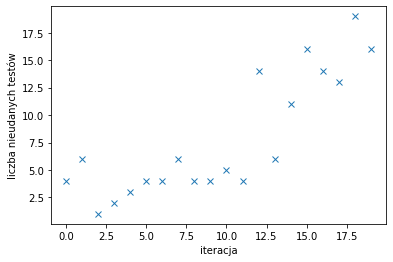

<Figure size 432x288 with 0 Axes>

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

new_intensity_matrix = np.copy(intensity_matrix)
results = []

for i in range(20):
    for _ in range(500):
        hi = random.randint(0, len(new_intensity_matrix) - 1), random.randint(0, len(new_intensity_matrix) - 1)
        new_intensity_matrix[hi[0]][hi[1]] += 1
        new_intensity_matrix[hi[1]][hi[0]] += 1
    failed = 0
    for _ in range(500):
        if not networkTest(new_intensity_matrix, 0.95, 0.01, connections_matrix, speed_matrix, avg_packet_size):
            failed += 1
    results.append(failed)

plt.plot(results, 'x')
plt.xlabel('iteracja')
plt.ylabel('liczba nieudanych testów')
plt.show()
plt.clf()

### Punkt 4.<br />

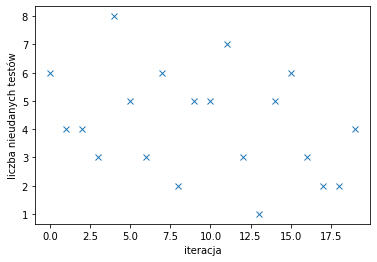

<Figure size 432x288 with 0 Axes>

In [32]:
new_speed_matrix = np.copy(speed_matrix)
results = []

for i in range(20):
    for _ in range(500):
        h1 = random.randint(0, len(new_speed_matrix) - 1)
        h2 = random.randint(0, len(new_speed_matrix) - 1)
        while connections_matrix[h1, h2] == 0 or h1 == h2:
            h1, h2 = random.randint(0, len(new_speed_matrix) - 1), random.randint(0, len(new_speed_matrix) - 1)
        new_speed_matrix[h1][h2] += 1000000
        new_speed_matrix[h1][h2] += 1000000
    failed = 0
    for _ in range(500):
        if not networkTest(new_intensity_matrix, 0.95, 0.01, connections_matrix, new_speed_matrix, avg_packet_size):
            failed += 1
    results.append(failed)

plt.plot(results, 'x')
plt.xlabel('iteracja')
plt.ylabel('liczba nieudanych testów')
plt.show()
plt.clf()

### Punkt 5.<br />

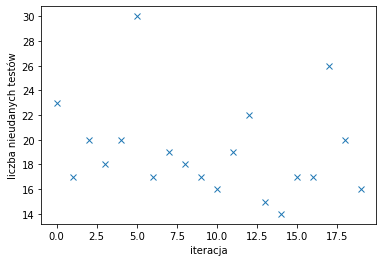

<Figure size 432x288 with 0 Axes>

In [34]:
new_connections_matrix = np.copy(connections_matrix)
results = []

for i in range(20):
    for _ in range(20):
        hi = random.randint(0, len(new_speed_matrix) - 1), random.randint(0, len(new_speed_matrix) - 1)
        while new_connections_matrix[hi[0], hi[1]] == 1 or hi[0] == hi[1]:
            hi = random.randint(0, len(new_speed_matrix) - 1), random.randint(0, len(new_speed_matrix) - 1)
        new_speed_matrix[hi[0]][hi[1]] = 1
        new_speed_matrix[hi[1]][hi[0]] = 1
    failed = 0
    for _ in range(500):
        if not networkTest(new_intensity_matrix, 0.95, 0.01, new_connections_matrix, speed_matrix, avg_packet_size):
            failed += 1
    results.append(failed)

plt.plot(results, 'x')
plt.xlabel('iteracja')
plt.ylabel('liczba nieudanych testów')
plt.show()
plt.clf()